In [115]:
import pandas as pd
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt


In [116]:
iris = pd.read_csv("Iris.csv")
iris.head(2)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa


In [117]:
iris.drop('Id', axis=1,inplace=True) #orijinal sette ıd sutununu sildirdim

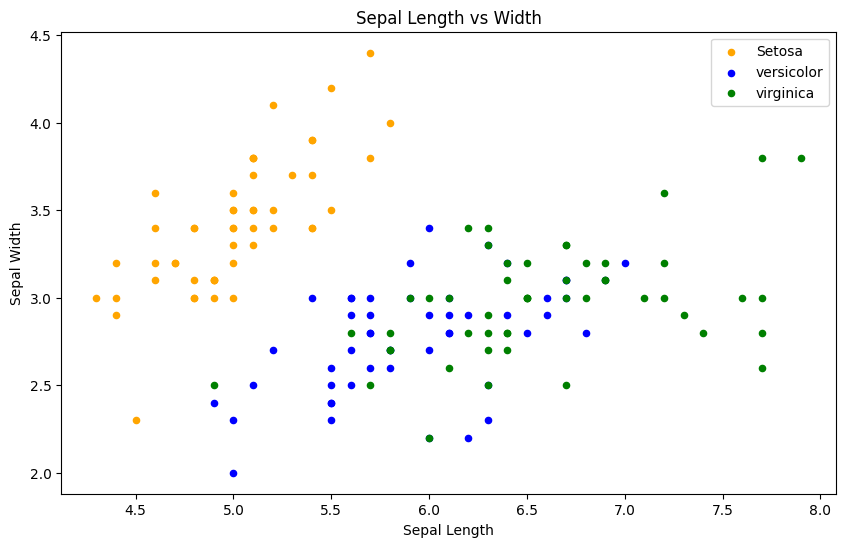

In [118]:
fig = iris[iris.Species == 'Iris-setosa'].plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm', color='orange', label='Setosa')
iris[iris.Species == 'Iris-versicolor'].plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm', color='blue', label='versicolor', ax=fig)
iris[iris.Species =='Iris-virginica'].plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm', color='green', label='virginica', ax=fig)
fig.set_xlabel("Sepal Length")
fig.set_ylabel("Sepal Width")
fig.set_title("Sepal Length vs Width")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

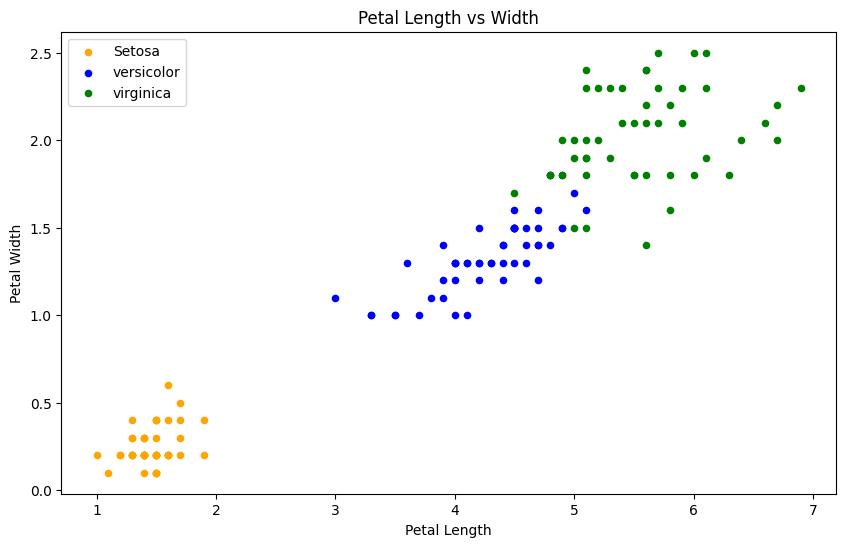

In [119]:
fig = iris[iris.Species == 'Iris-setosa'].plot(kind='scatter', x='PetalLengthCm', y='PetalWidthCm', color='orange', label='Setosa')
iris[iris.Species == 'Iris-versicolor'].plot(kind='scatter', x='PetalLengthCm', y='PetalWidthCm', color='blue', label='versicolor', ax=fig)
iris[iris.Species =='Iris-virginica'].plot(kind='scatter', x='PetalLengthCm', y='PetalWidthCm', color='green', label='virginica', ax=fig)
fig.set_xlabel("Petal Length")
fig.set_ylabel("Petal Width")
fig.set_title("Petal Length vs Width")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

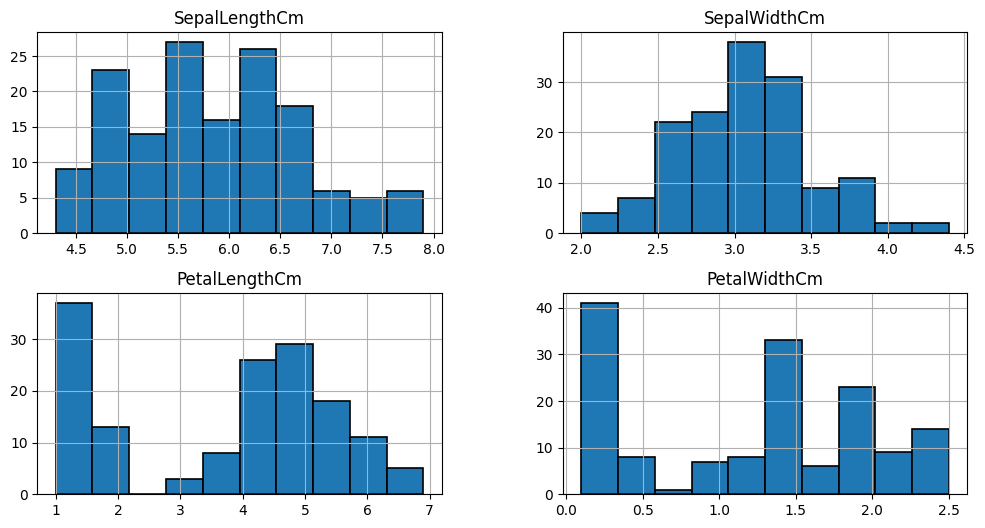

In [120]:
iris.hist(edgecolor = 'black', linewidth=1.2)
fig = plt.gcf()
fig.set_size_inches(12,6)
plt.show()

<Axes: xlabel='Species', ylabel='SepalWidthCm'>

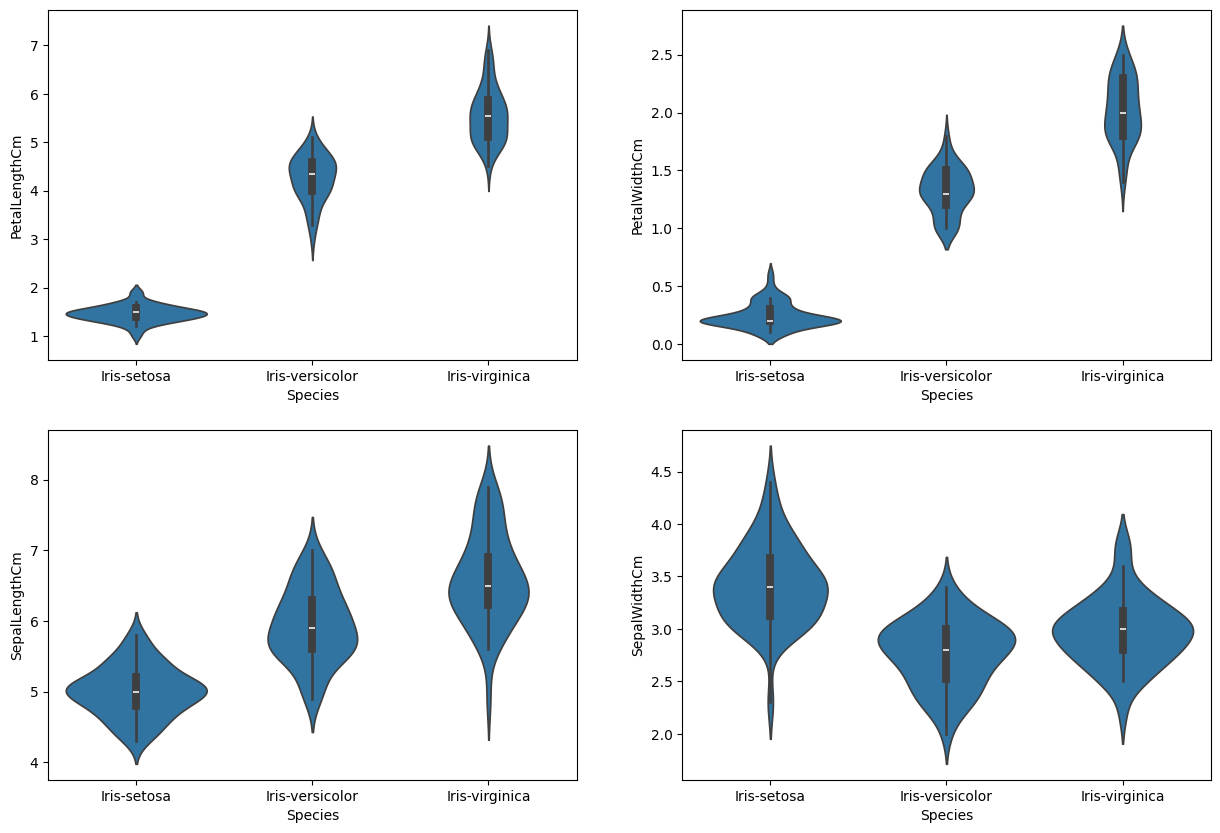

In [121]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species', y='PetalLengthCm', data=iris)
plt.subplot(2,2,2)
sns.violinplot(x='Species', y='PetalWidthCm', data=iris)
plt.subplot(2,2,3)
sns.violinplot(x='Species', y='SepalLengthCm', data=iris)
plt.subplot(2,2,4)
sns.violinplot(x='Species', y='SepalWidthCm', data=iris)

In [122]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier


In [123]:
iris.shape

(150, 5)

In [124]:
#iris['Species'] = iris['Species'].map({'Iris-setosa': 0, 
#                                        'Iris-versicolor': 1,
#                                        'Iris-virginica': 2})


In [125]:
iris.fillna

<bound method NDFrame.fillna of      SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0              5.1           3.5            1.4           0.2        0
1              4.9           3.0            1.4           0.2        0
2              4.7           3.2            1.3           0.2        0
3              4.6           3.1            1.5           0.2        0
4              5.0           3.6            1.4           0.2        0
..             ...           ...            ...           ...      ...
145            6.7           3.0            5.2           2.3        2
146            6.3           2.5            5.0           1.9        2
147            6.5           3.0            5.2           2.0        2
148            6.2           3.4            5.4           2.3        2
149            5.9           3.0            5.1           1.8        2

[150 rows x 5 columns]>

In [136]:
plt.figure(figsize=(7,4))
sns.barplot()
plt.show()

In [127]:
train, test = train_test_split(iris, test_size=0.3)
print(train.shape)
print(test.shape)

(105, 5)
(45, 5)


In [128]:
train_X = train[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
train_y = train.Species
test_X = test[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
test_y = test.Species

In [129]:
train_X.head(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
107,7.3,2.9,6.3,1.8
125,7.2,3.2,6.0,1.8


In [130]:
test_X.head(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
66,5.6,3.0,4.5,1.5
62,6.0,2.2,4.0,1.0


In [131]:
train_y.head()

107    2
125    2
128    2
48     0
90     1
Name: Species, dtype: int64

SVM

In [132]:
model = svm.SVC()
model.fit(train_X, train_y)
prediction = model.predict(test_X)
print('SVM: ', metrics.accuracy_score(prediction, test_y))

SVM:  0.9333333333333333


Logistic Regression

In [133]:
model = LogisticRegression()
model.fit(train_X, train_y)
prediction = model.predict(test_X)
print('logistic Regression: ', metrics.accuracy_score(prediction, test_y))

logistic Regression:  0.9333333333333333


Decision Tree

In [134]:
model = DecisionTreeClassifier()
model.fit(train_X, train_y)
prediction = model.predict(test_X)
print('Decision Tree: ',metrics.accuracy_score(prediction, test_y))

Decision Tree:  0.9333333333333333


KNN

In [135]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(train_X,train_y)
prediction = model.predict(test_X)
print('KNN: ', metrics.accuracy_score(prediction,test_y))

KNN:  0.9333333333333333
